#### Why to use NumPy?  

> Answer

> NumPy is the fundamental package for **scientific computing** in Python. It is a Python library that provides:

* A multidimensional array object,
* Various derived objects (such as masked arrays and matrices), and
* An assortment of routines for fast operations on arrays, including
  * Mathematical,
  * Logical,
  * Shape manipulation,
  * Sorting,
  * Selecting,
  * I/O,
  * Discrete Fourier transforms,
  * Basic linear algebra,
  * Basic statistical operations,
  * Random simulation and much more.

#### What is the difference between ndarray and array in NumPy?  

> Answer

> **numpy.array** is just a convenience function to create an **ndarray**; it is not a class itself.

> You can also create an array using **numpy.ndarray**, but it is not the recommended way.

> If you want to create an array from **ndarray** class you can do it in 2 ways as quoted:

1. Using **array(), zeros()** or **empty()** methods: Arrays should be constructed using array, zeros or empty (refer to the See Also section below). The parameters are given here refer to a low-level method **(ndarray(…))** for instantiating an array.

2. From **ndarray** class directly: There are two modes of creating an array using **__new__**: If buffer is None, then only shape, dtype, and order are used. If buffer is an object exposing the buffer interface, then all keywords are interpreted.

#### How would you convert a Pandas DataFrame into a NumPy array?  

> Answer

> Use **to_numpy()**, which is defined on **Index, Series**, and **DataFrame** objects.

> Consider:

In [ ]:
import numpy as np
import pandas as pd
# Setup
df = pd.DataFrame(data={'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}, 
                  index=['a', 'b', 'c'])

# Convert the entire DataFrame
df.to_numpy()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [ ]:
# Convert specific columns
df[['A', 'C']].to_numpy()

array([[1, 7],
       [2, 8],
       [3, 9]])

> Other solutions you shall avoid:

* DataFrame.values has inconsistent behaviour. With .values it was unclear whether the returned value would be the actual array, some transformation of it, or one of pandas custom arrays (like Categorical). For example, with PeriodIndex, .values generates a new ndarray of period objects each time.
* DataFrame.get_values() is simply a wrapper around DataFrame.values, so everything said above applies.
* DataFrame.as_matrix() is deprecated now, do NOT use!

#### Explain what is ndarray in NumPy? 

> Answer

> At the core of the NumPy package, is the ndarray object. This encapsulates n-dimensional arrays of homogeneous data types, with many operations being performed in compiled code for performance. There are several important differences between NumPy arrays and the standard Python sequences:

* NumPy arrays have a fixed size at creation, unlike Python lists (which can grow dynamically). Changing the size of an ndarray will create a new array and delete the original.
* The elements in a NumPy array are all required to be of the same data type, and thus will be the same size in memory. The exception: one can have arrays of (Python, including NumPy) objects, thereby allowing for arrays of different-sized elements.
* NumPy arrays facilitate advanced mathematical and other types of operations on large numbers of data. Typically, such operations are executed more efficiently and with less code than is possible using Python’s built-in sequences.
* A growing plethora of scientific and mathematical Python-based packages are using NumPy arrays; though these typically support Python-sequence input, they convert such input to NumPy arrays prior to processing, and they often output NumPy arrays. In other words, in order to efficiently use much (perhaps even most) of today’s scientific/mathematical Python-based software, just knowing how to use Python’s built-in sequence types is insufficient - one also needs to know how to use NumPy arrays.

#### Compute the min/max for each row for a NumPy 2D array?

> Problem

> Compute the min-by-max for each row for the given 2d NumPy array:



In [ ]:
np.random.seed(100)
a = np.random.randint(1,10, [5,3])
a

array([[9, 9, 4],
       [8, 8, 1],
       [5, 3, 6],
       [3, 3, 3],
       [2, 1, 9]])

> Answer

> apply_along_axis applies the supplied function along with 1D slices of the input array, with the slices taken along the axis you specify.

> Consider:

In [ ]:
# Input
np.random.seed(100)
a = np.random.randint(1,10, [5,3])
a

# Solution
np.apply_along_axis(lambda x: np.min(x)/np.max(x), arr=a, axis=1)

array([0.44444444, 0.125     , 0.5       , 1.        , 0.11111111])

#### How to create new columns derived from existing columns in Pandas?  

> Answer

* We create a new column by assigning the output to the DataFrame with a new column name in between the [].
* Let's say we want to create a new column 'C' whose values are the multiplication of column 'B' with column 'A'. The operation will be easy to implement and will be element-wise, so there's no need to loop over rows.

In [ ]:
import pandas as pd

# Create example data
df = pd.DataFrame({
  "A": [420, 380, 390],
  "B": [50, 40, 45]
})

df["C"] = df["A"] * df["B"]

* Also other mathematical operators (+, -, \*, /) or logical operators (<, >, =,…) work element-wise. But if we need more advanced logic, we can use arbitrary Python code via apply().
* Depending on the case, we can use rename with a dictionary or function to rename row labels or column names according to the problem.

#### How are iloc() and loc() different?  

> Answer

* DataFrame.iloc is a method used to retrieve data from a Data frame, **and it is an integer position-based locator (from 0 to length-1 of the axis)**, but may also be used with a boolean array. It takes input as integer, arrays of integers, a slice object, boolean array and functions.

In [ ]:
df.iloc[0]
df.iloc[-5:]
df.iloc[:, 2]    # the : in the first position indicates all rows
df.iloc[:3, :3] # The upper-left 3 X 3 entries (assuming df has 3+ rows and columns)

,A,B,C
0,420,50,21000
1,380,40,15200
2,390,45,17550


* DataFrame.loc **gets rows (and/or columns)** with particular labels. It takes input as a single label, list of arrays and slice objects with labels.

In [ ]:
df = pd.DataFrame(index=['a', 'b', 'c'], columns=['time', 'date', 'name'])
df.loc['a']     # equivalent to df.iloc[0]
df.loc['b':, 'date']   # equivalent to df.iloc[1:, 1]

b    NaN
c    NaN
Name: date, dtype: object

#### What are the operations that Pandas Groupby method is based on ?  

> Answer

* Splitting the data into groups based on some criteria.
* Applying a function to each group independently.
* Combining the results into a data structure.

#### Describe how you will get the names of columns of a DataFrame in Pandas? 

> Answer

* By Simply iterating over columns, and printing the values.

In [ ]:
for col in df.columns:
    print(col)

time
date
name


* Using .columns() method with the dataframe object, this returns the column labels of the DataFrame.

In [ ]:
list(df.columns)

['time', 'date', 'name']

* Using the column.values() method to return an array of index.

In [ ]:
list(df.columns.values)

['time', 'date', 'name']

* Using sorted() method, which will return the list of columns sorted in alphabetical order.

In [ ]:
sorted(df)

['date', 'name', 'time']

#### In Pandas, what do you understand as a bar plot and how can you generate a bar plot visualization?

> Answer

* A Bar Plot is a plot that presents categorical data with rectangular bars with lengths proportional to the values that they represent.
* A bar plot shows comparisons among discrete categories.
* One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

In [ ]:
# Code Sample for how to plot
df.plot.bar(x='x_values’', y='y_values')

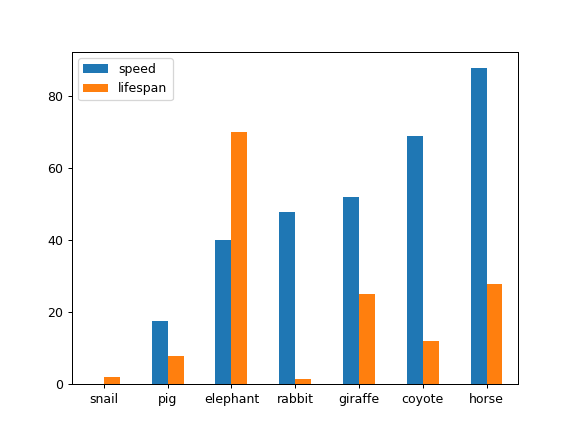

#### How would you iterate over rows in a DataFrame in Pandas?  
 
> Answer

> DataFrame.iterrows is a generator which yields both the index and row (as a Series):

In [ ]:
import pandas as pd

df = pd.DataFrame({'c1': [10, 11, 12], 'c2': [100, 110, 120]})

for index, row in df.iterrows():
    print(row['c1'], row['c2'])

10 100
11 110
12 120


#### How to check whether a Pandas DataFrame is empty?  
 
> Answer

> You can use the attribute df.empty to check whether it's empty or not:

In [ ]:
if df.empty:
    print('DataFrame is empty!')

#### Define the different ways a DataFrame can be created in Pandas?  
 
> Answer

> We can create a DataFrame using the following ways:

* Constructing DataFrame from a dictionary:

In [ ]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


* Constructing a DataFrame from numpy ndarray:

In [ ]:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])
df2

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


#### Why do should make a copy of a DataFrame in Pandas?  
 
> Answer

> In general, it is safer to work on copies than on original DataFrames, except when you know that you won't be needing the original anymore and want to proceed with the manipulated version.

> This is because in Pandas, indexing a DataFrame returns a reference to the initial DataFrame. Thus, **changing the subset will change the initial DataFrame. Thus, you'd want to use the copy if you want to make sure the initial DataFrame shouldn't change**.

> Normally, you would still have some use for the original data frame to compare with the manipulated version, etc. Therefore, depending on the case it's a good practice to work on copies and merge at the end.

#### What does the in operator do in Pandas?  
 
> Answer

* The in operator in Python tests dictionary **keys**, not values. In Pandas, Series are dict-like, therefore, the in operator on a Series tests for membership in the **index**, not membership among the values. If we want to test for membership in the values, we use the method isin().

* For DataFrames, likewise, in applies to the **column axis**, testing for membership in the list of column names.

#### How does the groupby() method works in Pandas?  
 
> Answer

* In the first stage of the process, data contained in a pandas object, whether a Series, DataFrame, or otherwise, is **split** into groups based on one or more keys that we provide.

* The **splitting** is performed on a particular axis of an object. For example, a DataFrame can be grouped on its rows (axis=0) or its columns (axis=1).

* Once this is done, a function is applied to each group, producing a new value. Finally, the results of all those function applications are combined into a result object. The form of the resulting object will usually depend on what's being done to the data.

* In the figure below, this process is illustrated for a simple group aggregation.

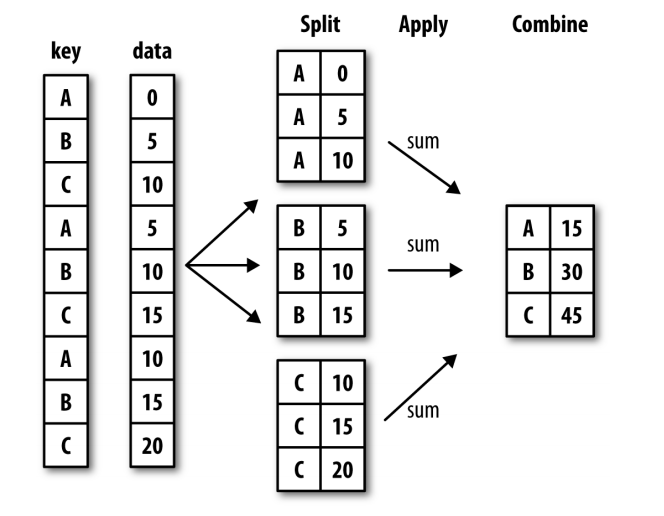

#### Name some methods you know to replace NaN values of a DataFrame in Pandas? 
 
> Answer

> To replace missing values in a Pandas DataFrame we can use the fillna() function, In Pandas, some methods available to use in this function are:

* pad / ffill: propagate last valid observation forward to next valid back with df.fillna(method="pad").
* fill / bfill: use next valid observation to fill the missing value with df.fillna(method="fill").
* Replace NaN with a scalar value with df.fillna(n), where n can be int, str, etc.
* Replace NaN with a PandasObject: the use case of this is to fill a DataFrame with the resulting operation of apply a function to a column. For example replace NaN values with a mean of some column (df.fillna(df.mean()).

#### Write a code snippet to reverse an array.

> Answer

> Two ways of reversing an array are as follows:

1. Using flip() function



In [ ]:
import numpy as np
arr1=np.array([1, 2, 3, 4])
arr2=np.flip(arr1)
print(arr2)

[4 3 2 1]


2. Without using any function

In [ ]:
import numpy as np
arr1=np.array([1, 2, 3, 4])
arr2= arr1[::-1]
print(arr2)

[4 3 2 1]


#### Write a code snippet to get an element, delete an element and update an element in an array.

> Answer

> Access: The element of an array can be accessed by using array_name[index].

In [ ]:
print(arr[index])

> Delete: The element of an array can be deleted using delete() function.

In [ ]:
arr2 = [1,2,3,4]
import numpy as np
x= np.delete(arr2,0)
print(x)

[2 3 4]


> Update: The element of an array can be using using below syntax:

In [ ]:
array_name[index] = element

#### Write a code snippet to concatenate lists.
> Suppose, given two lists are:

> *List1= [“W”, “a”, “w”,”b”]*

> *List2 = [“e”, “ “,”riting”,”log”]*

> And the output should be:

> **[‘We’, ‘a ‘, ‘writing’, ‘blog’]**

> This can be done using zip() function which iterates through both lists and combines them index-wise.

> Answer

In [ ]:
lst1= ['W', 'a', 'w','b']
lst2 = ['e', ' ','riting','log']
lst3 = [x + y for x, y in zip(lst1, lst2)]
print(lst3)

['We', 'a ', 'writing', 'blog']


#### Write a code snippet to generate square of every element of a list.
> * Input: [1, 2, 3, 4]*

> * Output: [1, 4, 9, 16] *

> First, create an empty list. We used a for loop to iterate through every element of a list and multiply the element by itself to generate a square of it. Then, append to the newly generated list.

> Answer

In [ ]:
lst = [1, 2, 3, 4]
lst_final = []
for x in lst:
    lst_final.append(x * x)
print(lst_final)
#The for loop takes first element i.e., 1, multiply it with itself and then append it to the list. 
#Then second element i.e., 2 is taken, multiply it by itself and appended to the list and so on.

[1, 4, 9, 16]


#### Write a code to replace each element in an array by its rank in the array?

> Answer

In [ ]:
def changeArr(input1):
 
    newArray = input1.copy()
    newArray.sort()
     
    for i in range(len(input1)):
        for j in range(len(newArray)):
            if input1[i]==newArray[j]:
                input1[i] = j+1;
                break;
    
# Driver Code
arr = [100, 2, 70, 12 , 90]
changeArr(arr)
# Print the array elements
print(arr)

[5, 1, 3, 2, 4]


#### Write a code to find circular rotation of an array by K positions?

> Answer

In [ ]:
def rotateArray(arr, n, d):
    temp = []
    i = 0
    while (i < d):
        temp.append(arr[i])
        i = i + 1
    i = 0
    while (d < n):
        arr[i] = arr[d]
        i = i + 1
        d = d + 1
    arr[:] = arr[: i] + temp
    return arr
arr

[5, 1, 3, 2, 4]

#### Write a code to find non-repeating elements in an array?

> Answer


In [ ]:
# Python 3 program to count unique elements
def count(arr, n):

   # Mark all array elements as not visited
   visited = [False for i in range(n)]

   # Traverse through array elements
   # and count frequencies
   for i in range(n):

     # Skip this element if already
     # processed
     if (visited[i] == True):
        continue

     # Count frequency
     count = 1
     for j in range(i + 1, n, 1):
        if (arr[i] == arr[j]):
          visited[j] = True
          count += 1
     if count == 1 :
        print(arr[i]);
   

# Driver Code
arr = [10, 30, 40, 20, 10, 20, 50, 10]
n = len(arr)
count(arr, n)

30
40
50


#### Write a code to check for the longest palindrome in an array?

In [ ]:
# Function to check if n is palindrome
def isPalindrome(n):

   divisor = 1
   while (int(n / divisor) >= 10):
      divisor *= 10

   while (n != 0):
      leading = int(n / divisor)
      trailing = n % 10
  
      if (leading != trailing):
        return False

      n = int((n % divisor) / 10)

      divisor = int(divisor / 100)
   return True

# Function to find the largest palindromic element
def largestPalindrome(arr, n):
   currentMax = -1

   for i in range(0, n, 1):
      if (arr[i] > currentMax and isPalindrome(arr[i])):
         currentMax = arr[i]

   return currentMax

# Driver Code

arr = [1, 232, 5545455, 909090, 161]
n = len(arr)

# print required answer
print(largestPalindrome(arr, n))

5545455


#### Write a code to find the factorial of a number?

> Answer


In [ ]:
num = 5
output = 1
for i in range(2,num+1):
  output*=i
print(output)

120


#### Write the code to for Armstrong number?

> Answer

In [ ]:
number = 371
num = number
digit, sum = 0, 0
length = len(str(num))
for i in range(length):
  digit = int(num%10)
  num = num/10
  sum += pow(digit,length)
if sum==number:
  print("Armstrong")
else:
  print("Not Armstrong")

#### Write a program to find the sum of Natural Numbers using Recursion?

In [ ]:
def getSum(num):
  if num == 1:
    return 1
  return num + getSum(num-1)

num = 5
print(getSum(num))

#### Write a program for Binary to Decimal to conversion?

> Answer

In [ ]:
num = int(input("Enter number:"))
binary_val = num
decimal_val = 0
base = 1
while num > 0:
    rem = num % 10
    decimal_val = decimal_val + rem * base
    num = num // 10
    base = base * 2

print("Binary Number is {} and Decimal Number is {}".format(binary_val, decimal_val))

#### Write a program to check whether a character is a vowel or consonant?

> Answer

In [ ]:
#get user input
Char =  input() 
#Check if the Char belong to set of Vowels
if (Char == 'a' or Char == 'e' or Char == 'i' or Char == 'o' or Char == 'u'): 
    #if true 
    print("Character is Vowel") 
else: 
    #if false
    print("Character is Consonant")

### Thank You
